In [1]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gridMET_HUC12_monthly_stats.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13800 entries, 0 to 13799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13800 non-null  object 
 1   huc12   13800 non-null  int64  
 2   pr      13800 non-null  float64
 3   etr     13800 non-null  float64
 4   tmmn    13800 non-null  float64
 5   tmmx    13800 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 647.0+ KB


In [4]:
df

,Date,huc12,pr,etr,tmmn,tmmx
0,1999-01-01,170402080608,39.060099,29.871449,267.464841,275.573049
1,1999-01-01,170402080102,64.428112,25.744536,265.495550,273.381969
2,1999-01-01,170402080104,102.146274,25.714261,265.381321,272.548272
3,1999-01-01,170402080106,53.634767,27.612401,265.707416,272.942843
4,1999-01-01,170402080107,45.239523,31.851244,265.207004,273.609019
...,...,...,...,...,...,...
13795,2023-12-01,170402080401,65.066793,29.867497,265.809388,275.297381
13796,2023-12-01,170402080403,84.826814,29.918535,266.071679,275.001950
13797,2023-12-01,170402080205,68.954814,29.568637,264.661954,274.206108
13798,2023-12-01,170402080402,97.918302,29.801979,267.041072,275.103337


In [5]:
df['tmmn'] = df['tmmn'] - 273.15
df['tmmx'] = df['tmmx'] - 273.15

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [7]:
def wyear(df):
    """Convert month to water year."""
    # Water year starts in October, so if the month is October or later,
    month = df['Date'].month
    if month >= 10:
        return month, df['Date'].year + 1
    else:
        return month, df['Date'].year

In [8]:
df[['month', 'year']] = df.apply(wyear, axis=1, result_type='expand')

In [14]:
df[df['huc12'] == 170402080608].head(20)

,Date,huc12,pr,etr,tmmn,tmmx,month,year
0,1999-01-01,170402080608,39.060099,29.871449,-5.685159,2.423049,1,1999
46,1999-02-01,170402080608,35.073255,42.487280,-5.645029,4.010515,2,1999
92,1999-03-01,170402080608,13.930899,95.394818,-3.084758,10.481340,3,1999
138,1999-04-01,170402080608,45.785245,119.503000,-0.580616,12.893456,4,1999
184,1999-05-01,170402080608,50.009656,167.275821,3.477515,17.511582,5,1999
230,1999-06-01,170402080608,22.925134,207.008755,7.780060,23.996911,6,1999
276,1999-07-01,170402080608,5.975620,283.810680,9.949094,30.523565,7,1999
322,1999-08-01,170402080608,22.390143,238.322410,10.270602,30.211205,8,1999
368,1999-09-01,170402080608,2.602395,185.244242,3.780387,23.887577,9,1999
414,1999-10-01,170402080608,9.146752,150.158907,-0.321065,19.244308,10,2000


In [50]:
df = df[df['year'] >= 2000]

In [51]:
df

,Date,huc12,pr,etr,tmmn,tmmx,month,year
414,1999-10-01,170402080608,9.146752,150.158907,-0.321065,19.244308,10,2000
415,1999-10-01,170402080102,13.867218,142.360242,-0.802557,16.603201,10,2000
416,1999-10-01,170402080104,17.173224,140.443904,-0.168862,15.017666,10,2000
417,1999-10-01,170402080106,12.882457,147.478712,-0.553796,16.454206,10,2000
418,1999-10-01,170402080107,12.593617,155.724112,-1.524374,17.298994,10,2000
...,...,...,...,...,...,...,...,...
13795,2023-12-01,170402080401,65.066793,29.867497,-7.340612,2.147381,12,2024
13796,2023-12-01,170402080403,84.826814,29.918535,-7.078321,1.851950,12,2024
13797,2023-12-01,170402080205,68.954814,29.568637,-8.488046,1.056108,12,2024
13798,2023-12-01,170402080402,97.918302,29.801979,-6.108928,1.953337,12,2024


In [52]:
df_irr = df[df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # April to October
df_non_irr = df[~df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # November to March

In [53]:
df_irr

,Date,huc12,pr,etr,tmmn,tmmx,month,year
414,1999-10-01,170402080608,9.146752,150.158907,-0.321065,19.244308,10,2000
415,1999-10-01,170402080102,13.867218,142.360242,-0.802557,16.603201,10,2000
416,1999-10-01,170402080104,17.173224,140.443904,-0.168862,15.017666,10,2000
417,1999-10-01,170402080106,12.882457,147.478712,-0.553796,16.454206,10,2000
418,1999-10-01,170402080107,12.593617,155.724112,-1.524374,17.298994,10,2000
...,...,...,...,...,...,...,...,...
13703,2023-10-01,170402080401,45.509426,103.514572,1.042783,15.741040,10,2024
13704,2023-10-01,170402080403,53.984908,100.196190,1.187264,14.787197,10,2024
13705,2023-10-01,170402080205,56.562155,100.595233,1.053164,14.432425,10,2024
13706,2023-10-01,170402080402,59.579884,91.858285,1.691843,13.703880,10,2024


In [ ]:
df_grouped = df.groupby(['huc12', 'year',]).agg({ 
    'tmmn': ['mean'],
    'tmmx': ['mean',],
    'pr': ['sum'],
    'etr': ['sum'],
}).reset_index()

In [55]:
df_grouped

,huc12,year,tmmn,tmmx,pr,etr
,,,mean,mean,sum,sum
0,170402080101,2000,0.265103,14.575715,343.708029,1665.337981
1,170402080101,2001,-0.858293,13.093169,308.255378,1552.442889
2,170402080101,2002,-1.028179,12.523335,412.634734,1541.506276
3,170402080101,2003,0.563642,13.804878,346.360590,1528.596264
4,170402080101,2004,-0.090000,12.754948,491.543953,1458.753254
...,...,...,...,...,...,...
1145,170402080608,2020,0.603974,15.543496,240.207971,1655.121037
1146,170402080608,2021,1.559892,16.324384,198.838298,1764.561253
1147,170402080608,2022,1.020375,15.494428,276.881031,1598.775667


In [ ]:
#sen slope
def analyze_trends(df, var_list=['pr', 'etr', 'tmmn', 'tmmx']):
    results = []

    for huc12, group in df.groupby('huc12'):
        group_sorted = group.sort_values('year')

        trend_data = {'huc12': huc12}

        for var in var_list:
            series = group_sorted[var].values

            try:
                result = mk.original_test(series)
                trend_data[f'{var}_slope'] = result.slope
                trend_data[f'{var}_p'] = result.p
                trend_data[f'{var}_trend'] = result.trend
            except Exception as e:
                trend_data[f'{var}_slope'] = None
                trend_data[f'{var}_p'] = None
                trend_data[f'{var}_trend'] = None

        results.append(trend_data)

    return pd.DataFrame(results)



In [57]:
trend_df = analyze_trends(df_grouped)  # your HUC12-year aggregated dataframe

In [58]:
trend_df

,huc12,pr_slope,pr_p,pr_trend,etr_slope,etr_p,etr_trend,tmmn_slope,tmmn_p,tmmn_trend,tmmx_slope,tmmx_p,tmmx_trend
0,170402080101,6.512299,0.058524,no trend,-5.465779,0.037655,decreasing,0.013344,0.623812,no trend,-0.049563,0.065031,no trend
1,170402080102,7.078910,0.107072,no trend,-5.619790,0.037655,decreasing,0.005753,0.797252,no trend,-0.054645,0.058524,no trend
2,170402080103,11.728354,0.128996,no trend,-6.623288,0.014196,decreasing,-0.022967,0.413686,no trend,-0.068664,0.014196,decreasing
3,170402080104,10.006024,0.117634,no trend,-6.597696,0.020770,decreasing,-0.012529,0.623812,no trend,-0.058904,0.042166,decreasing
4,170402080105,5.487116,0.141193,no trend,-6.427832,0.020770,decreasing,0.006379,0.833516,no trend,-0.053245,0.065031,no trend
5,170402080106,4.361921,0.141193,no trend,-6.430805,0.008312,decreasing,0.002740,0.944142,no trend,-0.064443,0.016148,decreasing
6,170402080107,4.240213,0.198959,no trend,-7.531694,0.012455,decreasing,0.005462,0.870137,no trend,-0.058247,0.042166,decreasing
7,170402080108,6.380286,0.168221,no trend,-7.060137,0.026506,decreasing,-0.002202,0.944142,no trend,-0.056583,0.058524,no trend
8,170402080201,5.261437,0.117634,no trend,-5.628660,0.033561,decreasing,0.010378,0.797252,no trend,-0.063209,0.042166,decreasing
9,170402080202,5.182144,0.168221,no trend,-7.744151,0.014196,decreasing,0.004282,0.797252,no trend,-0.073195,0.020770,decreasing


In [59]:
summary = {
    'Variable': [],
    'Increasing': [],
    'Decreasing': [],
    'No Trend': []
}

for var in ['pr', 'etr', 'tmmn', 'tmmx']:
    counts = trend_df[f'{var}_trend'].value_counts()
    summary['Variable'].append(var)
    summary['Increasing'].append(counts.get('increasing', 0))
    summary['Decreasing'].append(counts.get('decreasing', 0))
    summary['No Trend'].append(counts.get('no trend', 0))

summary_df = pd.DataFrame(summary)


In [60]:
summary_df

,Variable,Increasing,Decreasing,No Trend
0,pr,0,0,46
1,etr,0,37,9
2,tmmn,0,3,43
3,tmmx,0,25,21


In [61]:
gdf = gpd.read_file('../portneuf_huc12/portneuf_huc12.shp')

<Axes: >

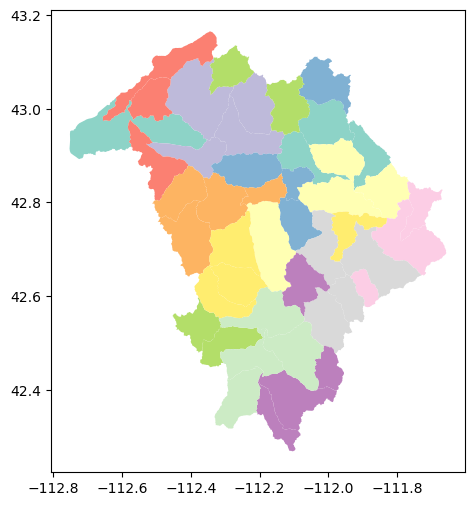

In [62]:
gdf.plot(figsize=(6,6), legend=True, cmap='Set3')

In [63]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   noncontr00  0 non-null      object  
 1   sourcedata  0 non-null      object  
 2   areaacres   46 non-null     object  
 3   humod       46 non-null     object  
 4   sourcefeat  0 non-null      object  
 5   huc12       46 non-null     object  
 6   shape_leng  46 non-null     object  
 7   tohuc       46 non-null     object  
 8   states      46 non-null     object  
 9   sourceorig  0 non-null      object  
 10  shape_area  46 non-null     object  
 11  areasqkm    46 non-null     object  
 12  hutype      46 non-null     object  
 13  name        46 non-null     object  
 14  tnmid       46 non-null     object  
 15  metasource  0 non-null      object  
 16  loaddate    46 non-null     object  
 17  gnis_id     0 non-null      object  
 18  noncontrib  0 non-null      object  
 19  ge

In [64]:
# Make sure HUC12 in shapefile and trend_df match in type
gdf['huc12'] = gdf['huc12'].astype(str)
trend_df['huc12'] = trend_df['huc12'].astype(str)

In [65]:
merged_gdf = gdf.merge(trend_df, left_on='huc12', right_on='huc12')


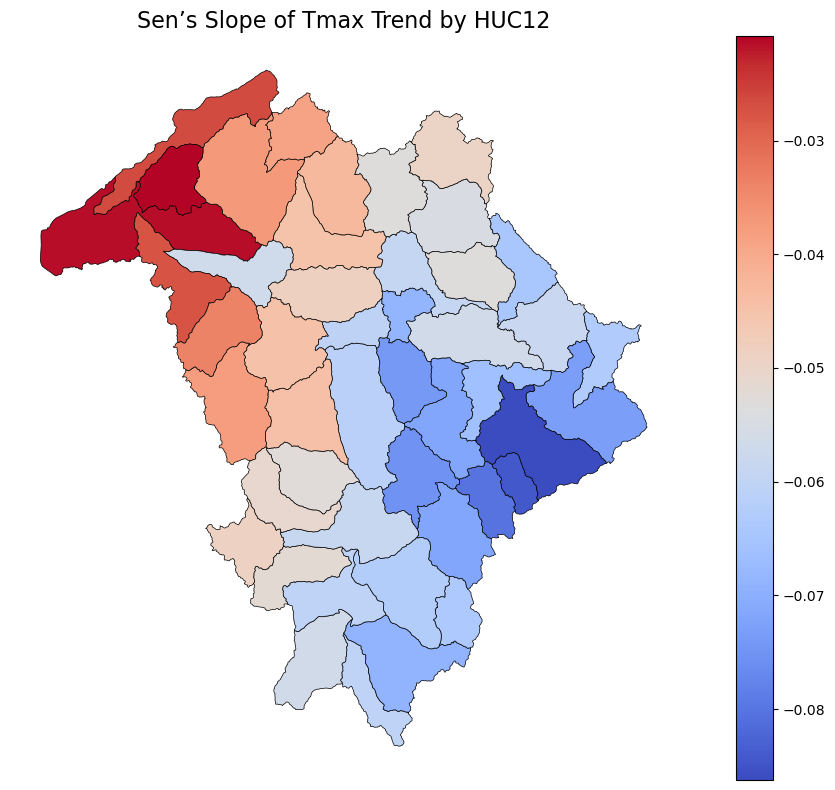

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(column='tmmx_slope', cmap='coolwarm', linewidth=0.5,
                edgecolor='black', legend=True, ax=ax)
ax.set_title('Sen’s Slope of Tmax Trend by HUC12', fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


In [51]:
import folium
from folium.plugins import MarkerCluster

# Reproject to WGS84 for folium
merged_gdf_wgs = merged_gdf.to_crs(epsg=4326)

# Create map
m = folium.Map(location=[merged_gdf_wgs.geometry.centroid.y.mean(),
                         merged_gdf_wgs.geometry.centroid.x.mean()],
               zoom_start=6)

# Add choropleth layer
folium.Choropleth(
    geo_data=merged_gdf_wgs,
    data=merged_gdf_wgs,
    columns=['huc12', 'tmmx_slope'],
    key_on='feature.properties.huc12',
    fill_color='RdBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Tmax Sen Slope'
).add_to(m)

# Save or show
m.save('tmmx_trend_map.html')


C:\Users\dines\AppData\Local\Temp\ipykernel_34304\805163383.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[merged_gdf_wgs.geometry.centroid.y.mean(),
C:\Users\dines\AppData\Local\Temp\ipykernel_34304\805163383.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_gdf_wgs.geometry.centroid.x.mean()],


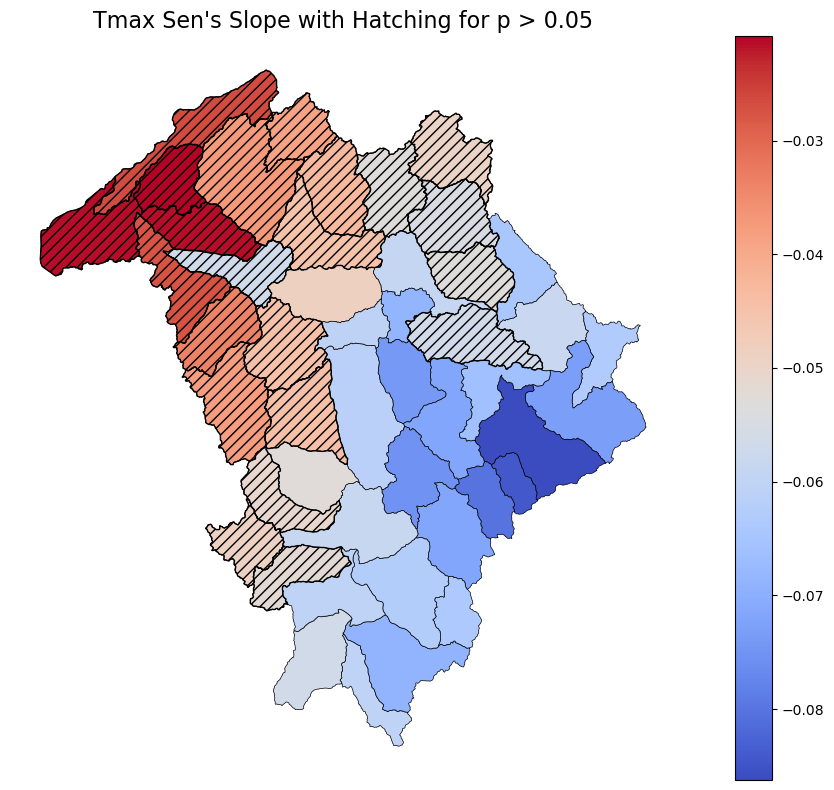

In [67]:
# Create masks for significance
sig = merged_gdf['tmmx_p'] < 0.05
not_sig = ~sig

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot filled choropleth for all
merged_gdf.plot(column='tmmx_slope', cmap='coolwarm', linewidth=0.5,
                edgecolor='black', legend=True, ax=ax)

# Hatch non-significant polygons
merged_gdf[not_sig].plot(color='none', edgecolor='black', hatch='///', ax=ax)

ax.set_title("Tmax Sen's Slope with Hatching for p > 0.05", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


In [57]:
# Reproject to WGS84
merged_gdf_wgs = merged_gdf.to_crs(epsg=4326)

# Split based on p-value
sig_gdf = merged_gdf_wgs[merged_gdf_wgs['tmmx_p'] < 0.05]
not_sig_gdf = merged_gdf_wgs[merged_gdf_wgs['tmmx_p'] >= 0.05]

# Base map
m = folium.Map(location=[merged_gdf_wgs.geometry.centroid.y.mean(),
                         merged_gdf_wgs.geometry.centroid.x.mean()],
               zoom_start=6)

# Plot significant regions
folium.Choropleth(
    geo_data=sig_gdf,
    data=sig_gdf,
    columns=['huc12', 'tmmx_slope'],
    key_on='feature.properties.huc12',
    fill_color='RdBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Tmax Sen Slope (significant)'
).add_to(m)

# Add non-significant with black outline only
for _, row in not_sig_gdf.iterrows():
    sim_geo = folium.GeoJson(data=row['geometry'].__geo_interface__,
                             style_function=lambda x: {
                                 'fillOpacity': 0,
                                 'color': 'black',
                                 'weight': 1.5,
                                 'dashArray': '5, 5'  # simulate "hatch"
                             })
    sim_geo.add_to(m)

# Save or view
m.save("tmmx_slope_map_hatching_simulated.html")


C:\Users\dines\AppData\Local\Temp\ipykernel_34304\3239718796.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[merged_gdf_wgs.geometry.centroid.y.mean(),
C:\Users\dines\AppData\Local\Temp\ipykernel_34304\3239718796.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_gdf_wgs.geometry.centroid.x.mean()],


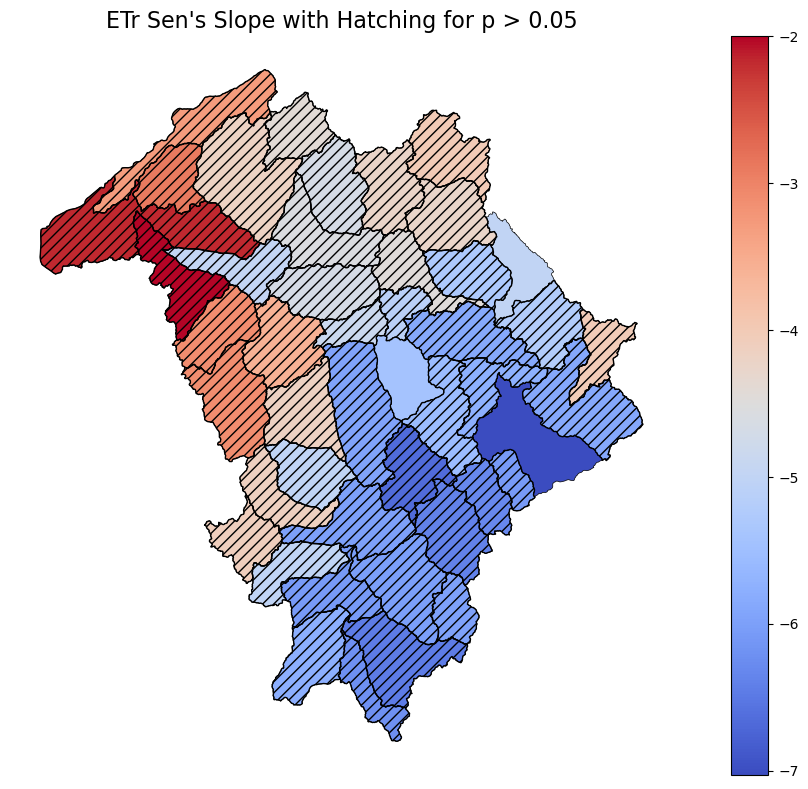

In [35]:
# Create masks for significance
sig = merged_gdf['etr_p'] < 0.05
not_sig = ~sig

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot filled choropleth for all
merged_gdf.plot(column='etr_slope', cmap='coolwarm', linewidth=0.5,
                edgecolor='black', legend=True, ax=ax)

# Hatch non-significant polygons
merged_gdf[not_sig].plot(color='none', edgecolor='black', hatch='///', ax=ax)

ax.set_title("ETr Sen's Slope with Hatching for p > 0.05", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


In [36]:
trend_df[['etr_slope', 'tmmx_slope', 'tmmn_slope', 'pr_slope']].corr()

,etr_slope,tmmx_slope,tmmn_slope,pr_slope
etr_slope,1.000000,0.900245,0.462706,-0.025983
tmmx_slope,0.900245,1.000000,0.245787,-0.194100
tmmn_slope,0.462706,0.245787,1.000000,0.226260
pr_slope,-0.025983,-0.194100,0.226260,1.000000


In [ ]:
df_grouped_irr = df_irr.groupby(['huc12', 'year',]).agg({ #this is wrong as year is wy year and will take last year oct in current year. make two cols one as wy_year and other as year
    'tmmn': ['mean'],
    'tmmx': ['mean',],
    'pr': ['sum'],
    'etr': ['sum'],
}).reset_index()
trend_df_irr = analyze_trends(df_grouped_irr)  # your HUC12-year aggregated dataframe

# Make sure HUC12 in shapefile and trend_df match in type
gdf['huc12'] = gdf['huc12'].astype(str)
trend_df_irr['huc12'] = trend_df['huc12'].astype(str)

merged_gdf_irr = gdf.merge(trend_df_irr, left_on='huc12', right_on='huc12')


In [74]:
trend_df_irr

,huc12,pr_slope,pr_p,pr_trend,etr_slope,etr_p,etr_trend,tmmn_slope,tmmn_p,tmmn_trend,tmmx_slope,tmmx_p,tmmx_trend
0,170402080101,2.952318,0.183112,no trend,-5.888357,0.014196,decreasing,0.032181,0.387514,no trend,-0.056167,0.033561,decreasing
1,170402080102,3.437356,0.293271,no trend,-6.494762,0.008312,decreasing,0.028126,0.315252,no trend,-0.058915,0.029855,decreasing
2,170402080103,4.953315,0.198959,no trend,-7.727137,0.008312,decreasing,-0.001219,0.981367,no trend,-0.064289,0.009531,decreasing
3,170402080104,4.761212,0.233613,no trend,-6.857603,0.006285,decreasing,-0.001037,0.944142,no trend,-0.058862,0.037655,decreasing
4,170402080105,2.880193,0.215785,no trend,-7.455969,0.004714,decreasing,0.024576,0.252461,no trend,-0.070866,0.016148,decreasing
5,170402080106,3.162811,0.387514,no trend,-7.164333,0.004070,decreasing,0.021418,0.440876,no trend,-0.062665,0.018332,decreasing
6,170402080107,2.758215,0.362378,no trend,-7.982219,0.002217,decreasing,0.022069,0.440876,no trend,-0.066941,0.016148,decreasing
7,170402080108,3.919575,0.198959,no trend,-8.014785,0.003507,decreasing,0.012331,0.440876,no trend,-0.075206,0.008312,decreasing
8,170402080201,3.261835,0.315252,no trend,-7.127051,0.005449,decreasing,0.021030,0.413686,no trend,-0.065760,0.016148,decreasing
9,170402080202,3.304635,0.338288,no trend,-9.068921,0.001895,decreasing,0.016671,0.362378,no trend,-0.079969,0.005449,decreasing


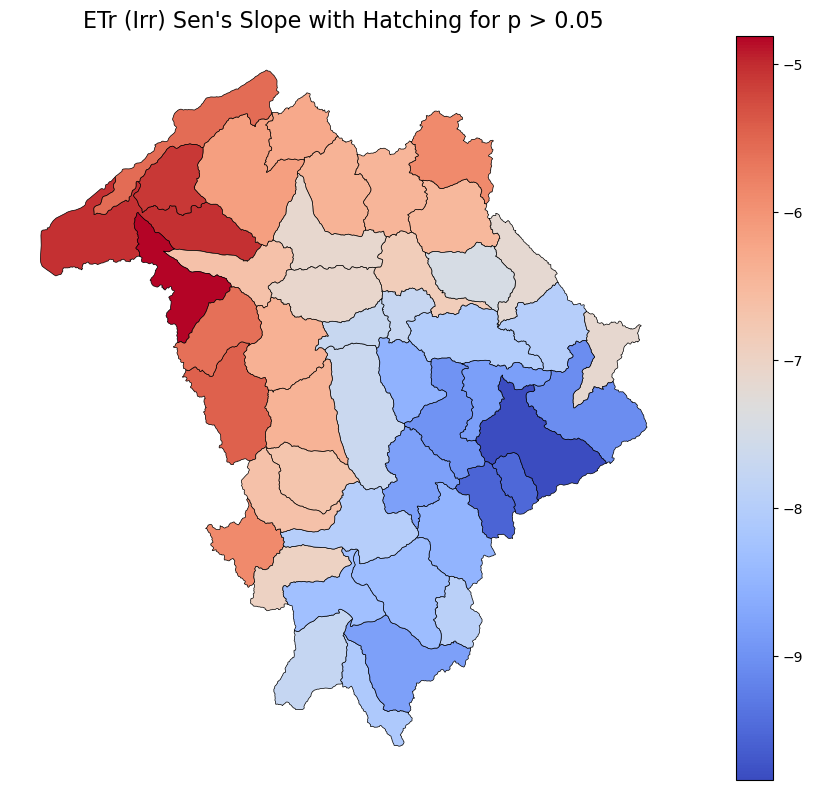

In [78]:
# Create masks for significance
sig = merged_gdf_irr['etr_p'] < 0.05
not_sig = ~sig

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot filled choropleth for all
merged_gdf_irr.plot(column='etr_slope', cmap='coolwarm', linewidth=0.5,
                edgecolor='black', legend=True, ax=ax)

# Hatch non-significant polygons
if not_sig.any():
    merged_gdf_irr[not_sig].plot(color='none', edgecolor='black', hatch='///', ax=ax)

ax.set_title("ETr (Irr) Sen's Slope with Hatching for p > 0.05", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


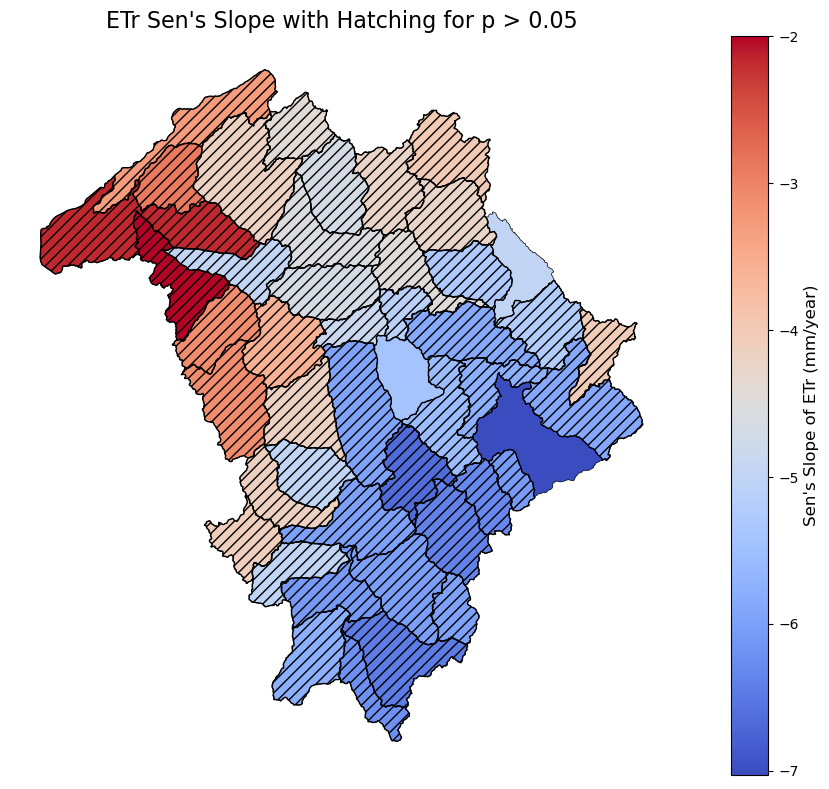

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot choropleth
plot = merged_gdf.plot(
    column='etr_slope',
    cmap='coolwarm',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add hatching
merged_gdf[merged_gdf['etr_p'] > 0.05].plot(
    color='none',
    edgecolor='black',
    hatch='///',
    ax=ax
)

# Add colorbar label
cbar = plot.get_figure().get_axes()[-1]
cbar.set_ylabel("Sen's Slope of ETr (mm/year)", fontsize=12)

ax.set_title("ETr Sen's Slope with Hatching for p > 0.05", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


In [40]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def plot_trend_map(
    gdf,
    slope_col,
    pval_col,
    title="Trend Map",
    cbar_label="Sen's Slope",
    vmin=None,
    vmax=None,
    hatch_pattern='///',
    significance_level=0.05,
    figsize=(12, 8),
    cmap='coolwarm',
    save_path=None
):
    """
    Plot trend map with hatching for non-significant areas.

    Parameters:
        gdf: GeoDataFrame
        slope_col: column name for Sen's slope
        pval_col: column name for p-values
        title: plot title
        cbar_label: colorbar label
        vmin, vmax: for colormap normalization
        hatch_pattern: pattern for hatching (e.g., '///')
        significance_level: p-value threshold for significance
        save_path: if provided, saves the figure to file
    """
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Determine significance
    sig_mask = gdf[pval_col] <= significance_level
    not_sig_mask = ~sig_mask

    # Color scale
    if vmin is not None and vmax is not None:
        norm = Normalize(vmin=vmin, vmax=vmax)
    else:
        norm = None

    # Base filled plot
    plot = gdf.plot(
        column=slope_col,
        cmap=cmap,
        linewidth=0.5,
        edgecolor='black',
        legend=True,
        ax=ax,
        norm=norm
    )

    # Hatching for non-significant polygons
    gdf[not_sig_mask].plot(
        color='none',
        edgecolor='black',
        hatch=hatch_pattern,
        ax=ax
    )

    # Colorbar labeling
    cbar = plot.get_figure().get_axes()[-1]
    cbar.set_ylabel(cbar_label, fontsize=12)

    # Title and formatting
    ax.set_title(title, fontsize=16)
    ax.axis('off')
    plt.tight_layout()

    # Save if path is given
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")

    plt.show()


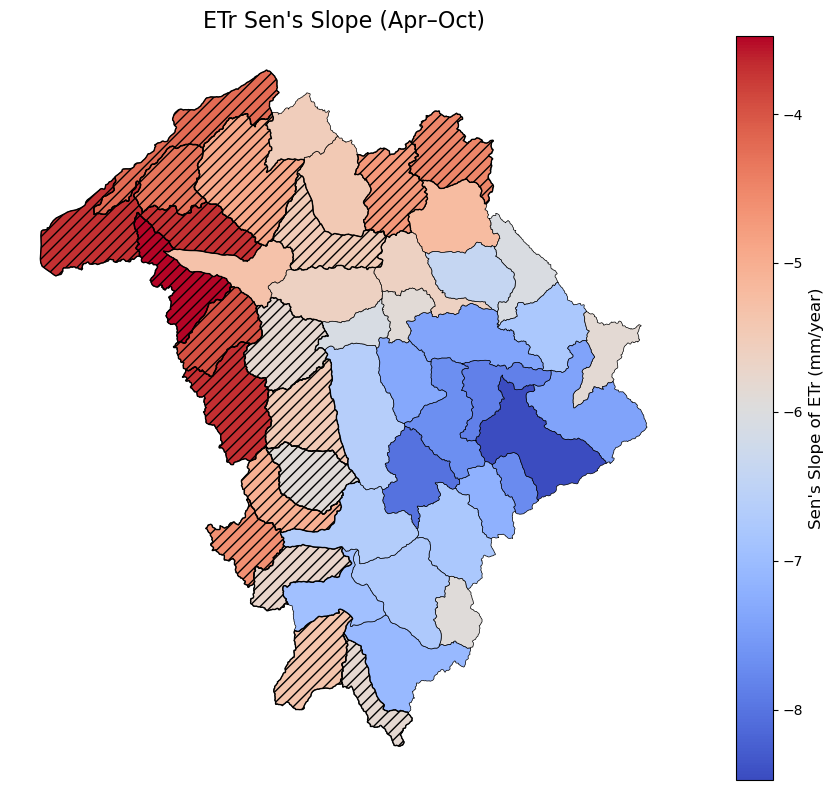

In [44]:
plot_trend_map(
    gdf=merged_gdf_irr,
    slope_col='etr_slope',
    pval_col='etr_p',
    title="ETr Sen's Slope (Apr–Oct)",
    cbar_label="Sen's Slope of ETr (mm/year)",
    vmin=None,
    vmax=None,
    hatch_pattern='///',
    save_path=None #"etr_slope_irrigated_map.png"
)


<Axes: >

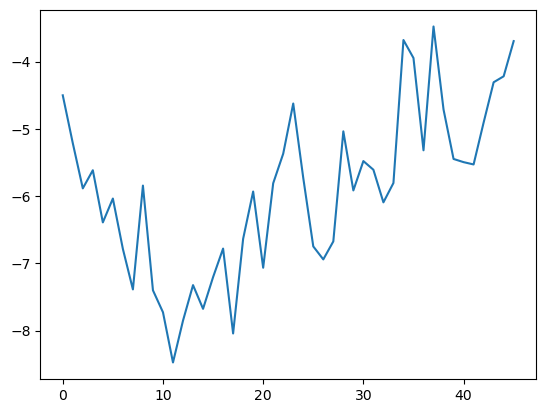

In [49]:
trend_df_irr['etr_slope'].plot()